# Data frame

In [1]:
import json
import pandas as pd
from string import punctuation
from pymorphy2 import MorphAnalyzer
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.draw import dispersion_plot
nltk.download('punkt')
morph = MorphAnalyzer()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
random.seed = 23



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Гриша\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
with open('book.txt', 'r', encoding='utf-8') as f:
    booktext = f.read()
for i in punctuation:
    booktext = booktext.replace(i, '')
%time tokens = (word_tokenize(booktext))

Wall time: 573 ms


# Тут у меня исправления моих ошибок в предыдущем задании
Заново делаю морф.парс, чтобы сделать нормальную таблицу по тегам для датафрейма. Делаю массив для каждого параметра

In [3]:
words_d = {}
word_forms = []
normal_forms = []
tags = []
POSs = []
cases = []
numbers = []
genders = []
anims = []
aspects = []
invols = []
moods = []
persons = []
tenses = []
trans = []
voices = []

for token in tokens:
    annotation = morph.parse(token)
    parse = annotation[0]
    tag = parse.tag
    pos = tag.POS
    tagstr = str(tag)
    tagstr = tagstr.split(',')
    word_forms.append(parse.word)
    normal_forms.append(parse.normal_form)
    tags.append(tagstr)
    POSs.append(tag.POS)
    cases.append(tag.case)
    numbers.append(tag.number)
    genders.append(tag.gender)
    anims.append(tag.animacy)
    aspects.append(tag.aspect)
    invols.append(tag.involvement)
    moods.append(tag.mood)
    persons.append(tag.person)
    tenses.append(tag.tense)
    trans.append(tag.transitivity)
    voices.append(tag.voice)
    
words_d['word_form'] = word_forms
words_d['normal_form'] = normal_forms
words_d['tags'] = tags
words_d['POS'] = POSs
words_d['case'] = cases
words_d['number'] = numbers
words_d['gender'] = genders
words_d['animacy'] = anims
words_d['aspect'] = aspects
words_d['involvement'] = invols
words_d['mood'] = moods
words_d['person'] = persons
words_d['tense'] = tenses
words_d['transitivity'] = trans
words_d['voice'] = voices

# Выгружаю в папку с программой новый файл специально для датафрейма

In [4]:
with open('tags_table.json', 'w', encoding='utf-8') as f:
    json.dump(words_d, f, ensure_ascii=False)

# Датафрейм
Делаю датафрейм и сохраняю файлом .csv

In [5]:
import pandas as pd
data_frame = pd.DataFrame(words_d)

data_frame.to_csv('v_mironov.csv', sep='\t', index=False)

## Загрузка
Загружаю датафрейм из созданного фалйа

In [6]:
mironov = pd.read_csv('v_mironov.csv', sep='\t').fillna('')
mironov.head(10)

,word_form,normal_form,tags,POS,case,number,gender,animacy,aspect,involvement,mood,person,tense,transitivity,voice
0,аннотация,аннотация,"['NOUN', 'inan', 'femn sing', 'nomn']",NOUN,nomn,sing,femn,inan,,,,,,,
1,роман,роман,"['NOUN', 'anim', 'masc', 'Name sing', 'nomn']",NOUN,nomn,sing,masc,anim,,,,,,,
2,вячеслава,вячеслав,"['NOUN', 'anim', 'masc', 'Name sing', 'gent']",NOUN,gent,sing,masc,anim,,,,,,,
3,миронова,миронов,"['NOUN', 'anim', 'masc', 'Sgtm', 'Surn sing', ...",NOUN,gent,sing,masc,anim,,,,,,,
4,я,я,"['NPRO', '1per sing', 'nomn']",NPRO,nomn,sing,,,,,,1per,,,
5,был,быть,"['VERB', 'impf', 'intr masc', 'sing', 'past', ...",VERB,,sing,masc,,impf,,indc,,past,intr,
6,на,на,['PREP'],PREP,,,,,,,,,,,
7,этой,этот,"['ADJF', 'Apro', 'Subx', 'Anph femn', 'sing', ...",ADJF,gent,sing,femn,,,,,,,,
8,войне,война,"['NOUN', 'inan', 'femn sing', 'loct']",NOUN,loct,sing,femn,inan,,,,,,,
9,действие,действие,"['NOUN', 'inan', 'neut sing', 'nomn']",NOUN,nomn,sing,neut,inan,,,,,,,


# Три(четыре) графика из семинара
Сделал на всякий случай побольше
Код из семинара с моими датафреймами на основе книжных данных

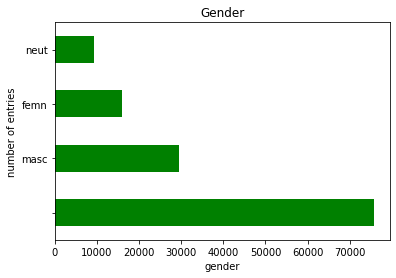

In [23]:
mironov['gender'].value_counts().plot.barh(
color='green');
plt.title('Gender')
plt.xlabel('gender')
plt.ylabel('number of entries');

Text(0, 0.5, 'number of entries')

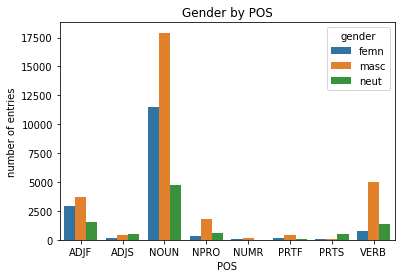

In [8]:
df2 = mironov[
    (mironov['gender'] != '') & (mironov['gender'] != 'мж')
][
    ['POS', 'gender', 'number']
].groupby(['POS', 'gender'], as_index=False).count()
df2.columns = ['POS', 'gender', 'total']
sns.barplot(x="POS", y="total", hue='gender', data=df2)
plt.title('Gender by POS')
plt.xlabel('POS')
plt.ylabel('number of entries')


Сделал кружок побольше для наглядности. Распределение рода только среди слов, у которых есть род

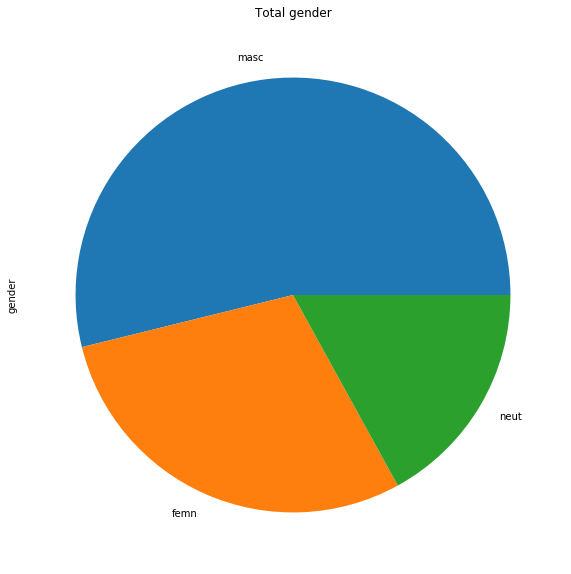

In [15]:
plt.figure(figsize=(10, 10))
mironov[(mironov['gender'] != '')]['gender'
].value_counts().plot(kind='pie');
plt.title('Total gender');

## Гистограмма
Я немного изменил гистограмму и сделал длинну словоформ. Для этого удобнее гистограмма.

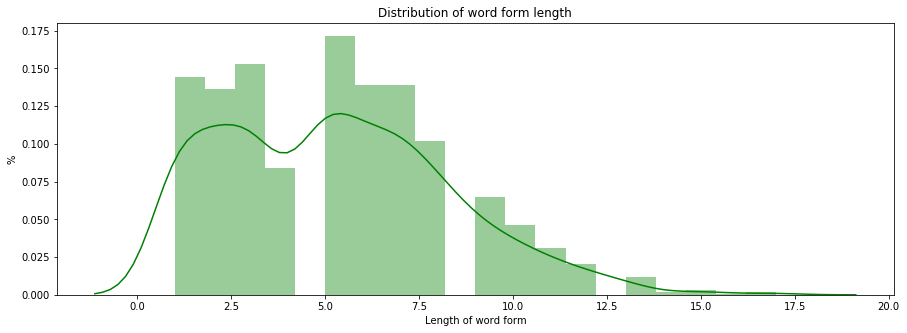

In [19]:
lendf = mironov[['normal_form', 'POS', 'gender']
].groupby(['normal_form', 'POS'], as_index=False).count()
lendf.columns = ['normal_form', 'POS', 'total']
lendf = lendf[lendf['total'] > 10]

lendf['length'] = mironov['word_form'].apply(len)
plt.figure(figsize=(15, 5))
sns.distplot(lendf['length'], bins=20, color='green')
plt.title('Distribution of word form length')
plt.ylabel('%')
plt.xlabel('Length of word form');

# Мои графики
К сожалению, возникла нерешаемая проблема с wordcloud, поэтому я не смог его сделать :(

## Самый частотный глагол
Я взял самый частотный глагол (быть) и сделал столбчатую диаграмму. На ней показано в каком времени чаще всего встречается глагол быть

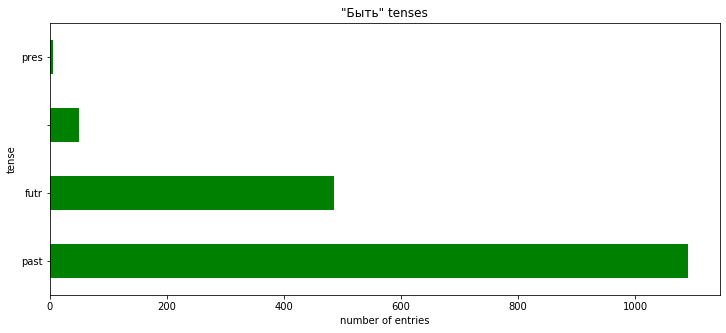

In [21]:
plt.figure(figsize=(12, 5))
mcverb = mironov[mironov['normal_form'] == 'быть'][
'tense'].value_counts().plot.barh(color='green');
plt.title('"Быть" tenses');
plt.ylabel('tense')
plt.xlabel('number of entries');

## Круговая диаграмма
КРуговая диаграмма показывает распределение рода среди прилагательных в единственном числе. У меня есть количество каждого рода, поэтому круговая диаграмма представит все нагляднее


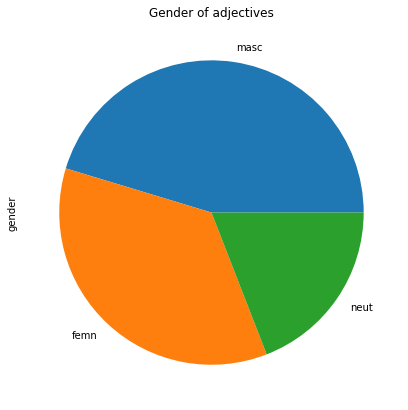

In [17]:
plt.figure(figsize=(7, 7))
mironov[(mironov['POS'] == 'ADJF') & (
mironov['number'] == 'sing')
]['gender'].value_counts().plot(kind='pie');
plt.title('Gender of adjectives');

## Еще одна стобчатая диаграмма
Тут я придумал показать распределение лица у глаголов в будущем и прошедшем времени (в прошедшем его ведь нет)
Сгруппировал параметры и вывел в строенные столбы. По Х у меня отложено время, по Y количество вхождений, разноцветные столбики показывают лицо. С помощью такой столбчатой диаграммы можно увидеть количество вхождений глагола определенного лица в каждом из времен, поэтому я выбрал этот тип

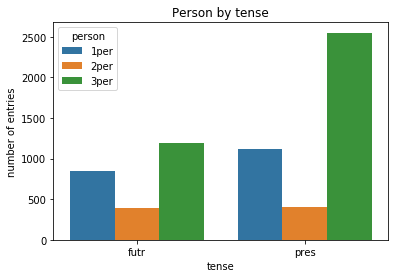

In [13]:
verbdf = mironov[
    (mironov['POS'] == 'VERB') & (mironov['person'] != '')
][
    ['person', 'tense', 'number']
].groupby(['person', 'tense'], as_index=False).count()
verbdf.columns = ['person', 'tense', 'total']
sns.barplot(x='tense', y="total", hue='person', data=verbdf)
plt.title('Person by tense')
plt.xlabel('tense')
plt.ylabel('number of entries');

## Dispersion plot
В начале задания для датафрейма я делал массив лексем, но здесь я все равно достаю normal_forms из датасета. Делаю их массивом, а затем перевожу в формат nltk
Имена (names) обработало не совсем правильно, туда попадали лишние слова. Пришлось отобрать имена основных персонажей вручную.
В тексте книги часто одних и тех же персонажей называют по-разному (сергей-серега), поэтому я поставил их друг под другом.
Далее пользуюсь функцией из документации и получаю график


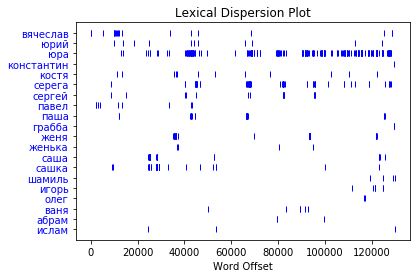

In [14]:
nltk_normal = nltk.Text(list(mironov['normal_form']))
names = ['вячеслав', 'юрий', 'юра', 'константин', 'костя', 
'серега', 'сергей', 'павел', 'паша', 'грабба', 'женя',
'женька', 'саша', 'сашка',
'шамиль', 'игорь', 'олег',
'ваня', 'абрам', 'ислам']
nltk_normal.dispersion_plot(names)
